In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [3]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Project\Lung comparison\Case22

07/02/2017  11:03    <DIR>          .
07/02/2017  11:03    <DIR>          ..
07/02/2017  11:03    <DIR>          .ipynb_checkpoints
07/02/2017  11:03    <DIR>          __pycache__
07/02/2017  11:03                72 Case22 7-2-2017.ipynb
07/02/2017  11:02         2,216,415 Case22_AAA.txt
07/02/2017  11:01         2,210,094 Case22_AXB.txt
25/11/2016  09:23             3,006 pyEclipseDVH.py
               4 File(s)      4,429,587 bytes
               4 Dir(s)  365,345,902,592 bytes free


In [4]:
AAA = eclipse_DVH('Case22_AAA.txt')
AXB = eclipse_DVH('Case22_AXB.txt')

Case22_AAA.txt loaded 	 patID = Case22_AAA	 Prescription [Gy] = 55.000
Case22_AXB.txt loaded 	 patID = Case22_AXB	 Prescription [Gy] = 55.000


In [5]:
AXB.DVH_df.columns

Index(['BODY', 'Foramen+3mm', 'L Brachial plex', 'Oesophagus', 'Heart',
       'Trachea', 'Airway avoidance', 'PTV CHEST', 'Lt_Lung', 'Foramen',
       'PTV ring 2-3cm', 'Rt_Lung', 'Bronchial tree', 'Both Lungs-ITV', 'skin',
       'PseudoPTV-ITV', 'ITV', 'Pseudo Ring', 'ribs', 'R Brachial plex',
       'Artefact', 'temp', 'Liver', 'Dose 50[%]', 'Dose 100[%]'],
      dtype='object')

(50, 80)

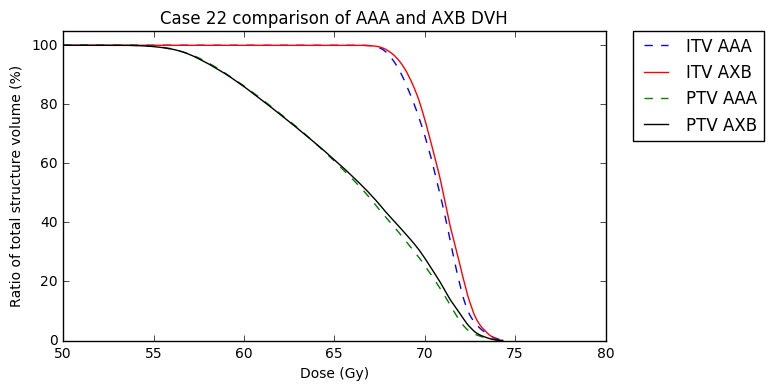

In [6]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'ITV'
plt.plot(AAA.DVH_df[structure], label="ITV AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="ITV AXB",  color='r' )

structure = 'PTV CHEST'
plt.plot(AAA.DVH_df[structure], label="PTV AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 22 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,80])

In [8]:
Comparison_df = pd.concat([  #AAA.metrics_df['PTV CHEST_P28'], 
                          # AXB.metrics_df['PTV CHEST_P28'], 
                           
                           AAA.metrics_df['ITV'], 
                           AXB.metrics_df['ITV']], 
                           axis=1)
Comparison_df

,ITV,ITV
Metric,,
Structure,ITV,ITV
Approval Status,Unapproved,Unapproved
Plan,Case22,Case22_AXB_Dm
Course,1,1
Volume [cmÂ³],12.6,12.6
Dose Cover.[%],100.0,100.0
Sampling Cover.[%],100.1,100.0
Min Dose [%],120.2,118.8
Max Dose [%],135.6,135.3
